Accuracy: 1.0
[[25  0  0]
 [ 0 26  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        25
   Satisfied       1.00      1.00      1.00        26
 Unsatisfied       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



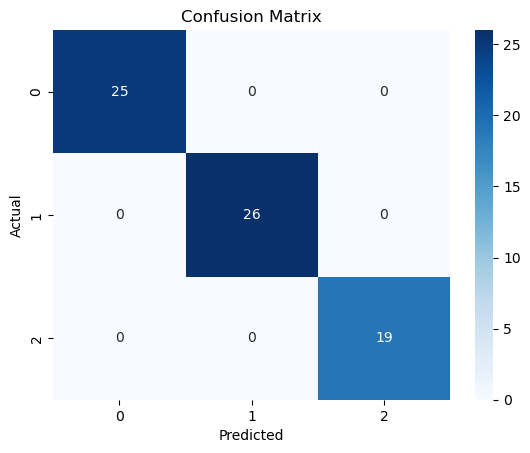

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('E-commerce Customer Behavior - Sheet1 (1).csv')

df.drop(['Customer ID'], axis=1, inplace=True)

df.dropna(inplace=True)

le_gender = LabelEncoder()
le_city = LabelEncoder()
le_membership = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['City'] = le_city.fit_transform(df['City'])
df['Membership Type'] = le_membership.fit_transform(df['Membership Type'])

X = df.drop('Satisfaction Level', axis=1)
y = df['Satisfaction Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
